## CSYE 7370 Assignment 2-Deep Q-Learning with an Atari-like game
### Jiachi Sun

In this assignment, I use the OpenAI Gym environment "Taxi-v3". The goal of Taxi is to pick-up passengers and drop them off at the destination in the least amount of moves.  
##### Code and license are at the bottom.

### 1. Establish a baseline performance. How well did your Deep Q-learning do on your problem? (5 Points)

###### Here is the parameters I used in baseline to train the Taxi-v3 environment. 

num_episodes = 2000  
gamma = 0.9     
alpha = 0.8   
max_steps = 99                  
epsilon = 1  
max_epsilon = 1.0               
min_epsilon = 0.01        
decay_rate = 0.005   
  
Here is the baseline performance. It can be found that after 600 times, the total reward is stable at around 10 and it is difficult to improve again.    
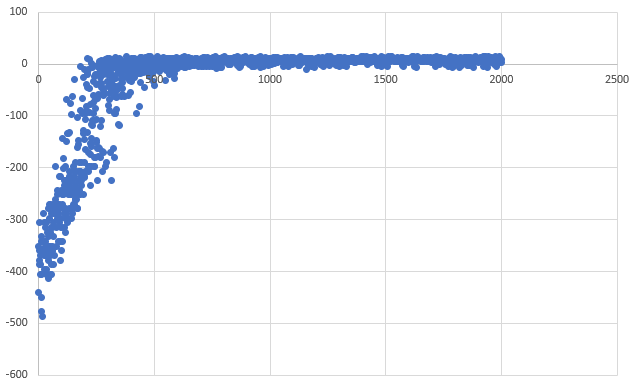

### 2. What are the states, the actions, and the size of the Q-table? (5 Points)

States:There are a total of 25 squares, i.e. the possible locations of the cab. The passenger can be in any of the four starting positions or in a taxi, for a total of five possibilities. Also, there are four possible destinations for the passenger.  
So, the total states: 25 * 5 * 4 = 500  

Action: [up, down, left, right, pick-up， drop-off]  

Size of the Q-table: A matrix with 500 rows and 6 columns.

### 3. What are the rewards? Why did you choose them? (5 Points)

The bonus for each action is -1. The bonus for delivering a passenger is +20. Illegal execution of "pickup" and "dropoff" actions is worth -10 points.  

We want to get the taxi to the passenger as quickly as possible and to the designated destination as quickly as possible. So there is overhead at every step. At the same time there is a big bonus received when delivering to the destination. There are also penalties for letting passengers off in the wrong place or using the pick-up command when there are no passengers

### 4. How did you choose alpha and gamma in the Bellman equation? Try at least one additional value for alpha and gamma. How did it change the baseline performance?  (5 Points)

In the first figure, gamma = 0.9 and alpha = 0.8.  
In the second graph, gamma = 0.99, alpha = 0.01.  

It can be observed that the effect on the reward is very high when modified gamma = 0.99, alpha = 0.01. As the training progresses, the reward obtained per turn becomes very unstable, while the reward obtained per episode is also more distributed at -100.  
The reason for this big change is that we set the alpha value very small. the smaller the alpha is set, the smaller the update of Q-value will be, and if we set it to 0, then there will be no learning at all.  
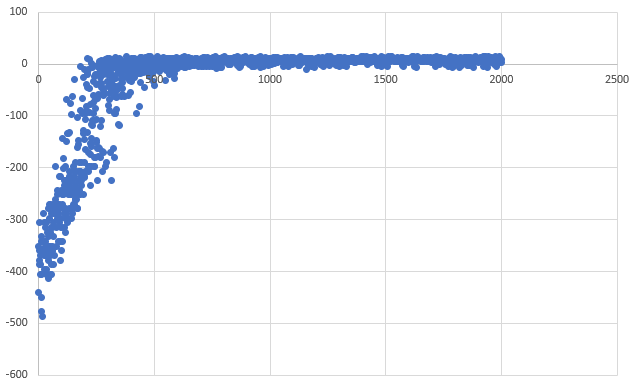

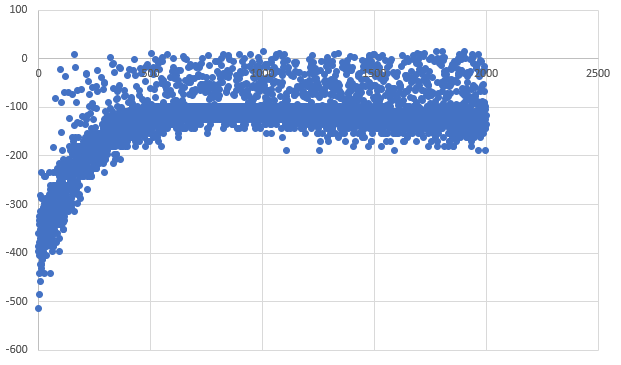

### 5. Try a policy other than e-greedy. How did it change the baseline performance? (5 Points)

I try to use random sampling policy to train our model. After we changed to random sampling policy, we found that there was no learning at all, it was completely random, because even though the Q-table was constantly updated we never made a selection based on the Q-table. So there is a huge difference from the baseline.  

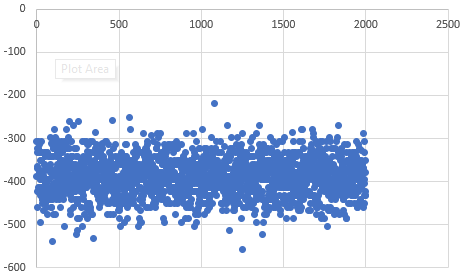

### 6. How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode? (5 Points)

For the baseline, I chose the decay rate = 0.005, starting epsilon = 1.  
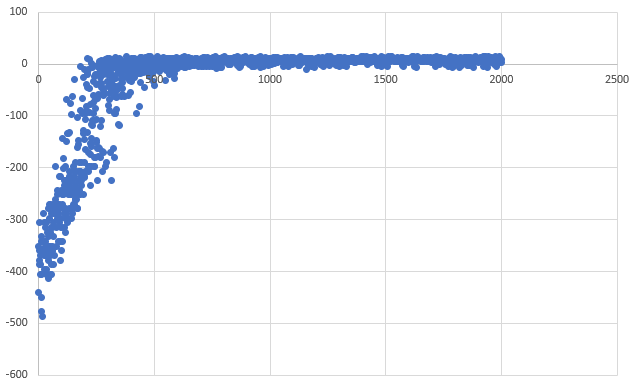
The figure below shows the result of choosing epsilon = 0.7 and decay_rate = 0.0001, we can see that the learning progress becomes very, very slow, because we set a very low decay rate, which causes the eplison to fall very slowly. The larger the value of eplison, the greater the probability of exploration rather than exploitation. When the eplison drops very slowly, we waste a lot of time on exploration, resulting in slow learning progress.  

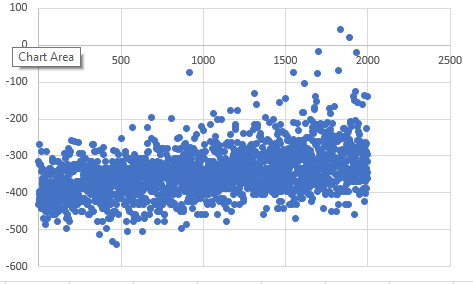

### 7. What is the average number of steps taken per episode? (5 Points)

The average steps taken per episode is **23.1**.  
We can see that after spending many steps at the beginning because there was very little information. The number of steps per episode becomes stable after around 500 episode.  
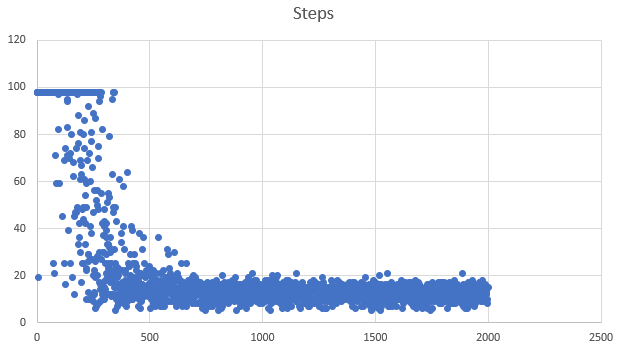

### 8. Does Q-learning use value-based or policy-based iteration? (5 Points)

Q-learning is a value-based iteration that uses the bellman equation to calculate the optimal MDP strategy and its value. In the value-based approach, the value function is repeatedly updated until the optimal value function is found. At the time of finding the optimal value function, it will be optimal to follow the most valuable function to make a choice.

### 9. Could you use SARSA for this problem? (5 Points)

We can use SARSA for this problem. Since both Q-learning and SARSA choose the action on each step base on the q-table and eplison-greedy policy. The different between Q-learning and SARSA is the way they update the q-table.

### 10. What is meant by the expected lifetime value in the Bellman equation?

The expected lifetime value is the value of Q on the left side of our equation (shown below). By analyzing the expected lifetime value, we can know how good we are at state s to take action a. It is the maximum total reward that can be obtained when action a is taken in state S. It is obtained as the sum of the immediate reward R and the future reward (discounted by gamma) obtained thereafter by following the optimal policy until the end of the event.   
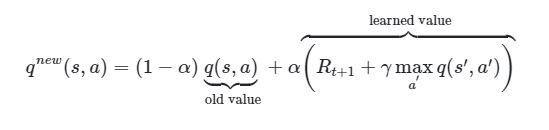

### 11. When would SARSA likely do better than Q-learning? (5 Points)

Compared to SARSA, Q learning is more radical. If there is a path that is close to the optimal path, but triggers a lot of negative rewards, Q learning will choose to try this path. But SARSA may not choose this path because of risk aversion.  
So, when we want to avoid triggering negative rewards as much as possible, or we want to receive as few penalties in our actions as possible, or the cost of making mistakes is too high, we should choose SARSA.

### 12. How does SARSA differ from Q-learning? (5 Points)  

SARSA is on-policy and learns action values relative to the policy it follows.  
Q-learning is off policy, in the next step the maximum Q' of all possible actions is used. This makes  Q-learning look like following a greedy policy.  
For example, at state s: Q will look at which action will bring the maximum reward, but will not necessarily actually choose that action. This is not the case for SARSA, where the action that is estimated to give the maximum reward is also the next action to be selected.

### 13. Explain the Q-learning algorithm. (5 Points)  

Q learning is an off-policy algorithm, which use the Q-table to decide what action to take under state s. For the q-table: Each row of the table represents each state, each column represents each action, and the value of the table is the maximum expected future reward that can be obtained when each action is taken in each state.  
By using the Q-table, we can find the optimal behavior in each state and get the maximum expected reward. We update and calculate the q table by first selecting an action through the $\epsilon$-greedy strategy and updating the corresponding Q value through the Bellman equation after the action is selected. This process is repeated until S is terminal.  
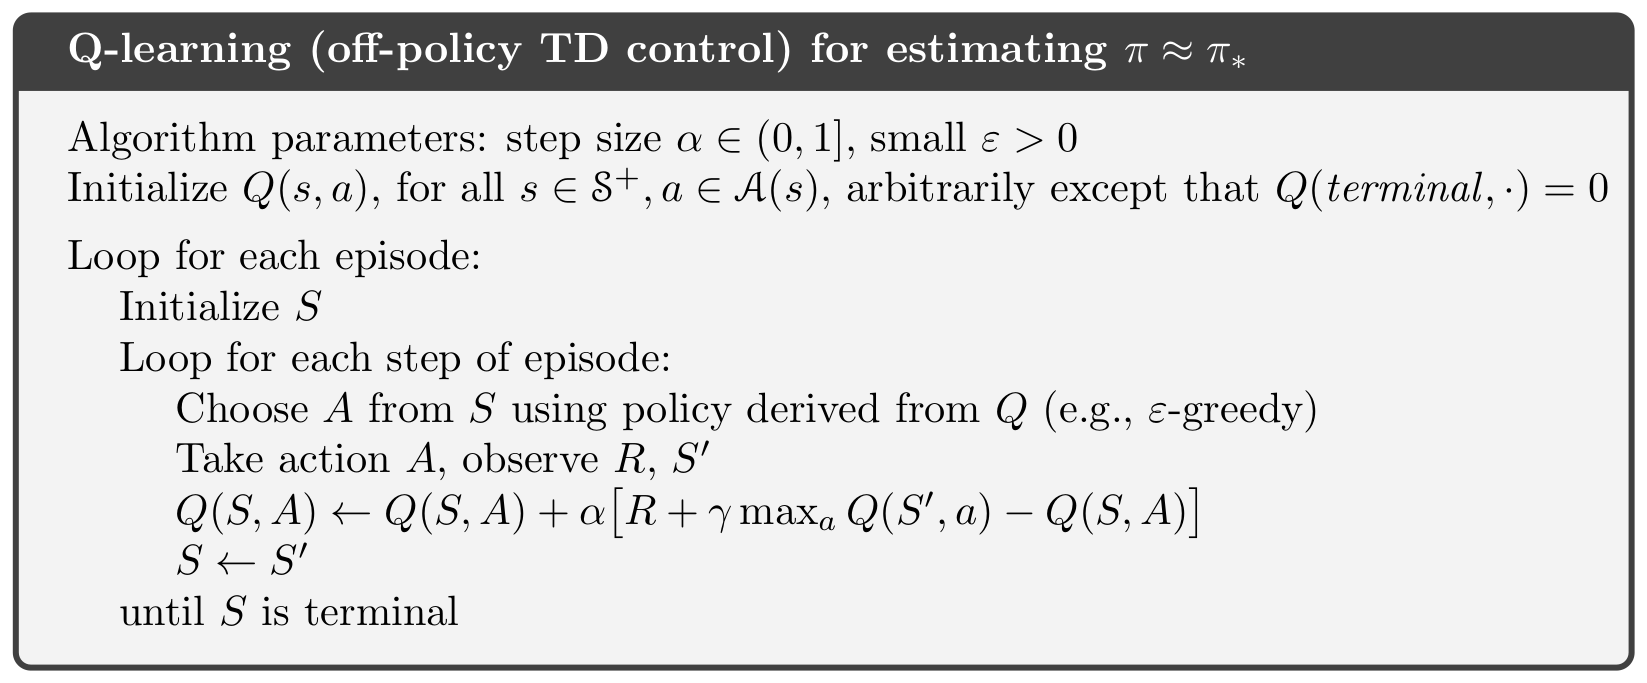

### 14. Explain the SARSA algorithm. (5 Points)  

SARSA (State–action–reward–state–action), is on-policy and learns action values relative to the policy it follows. SARSA also use the q-table to decide which action to take. At each step in one episode, SARSA first confirms the action through the $\epsilon$-greedy policy, and then updates the Q value based on the action performed. Also, for SARSA, where the action that is estimated to give the maximum reward is also the next action to be selected.  
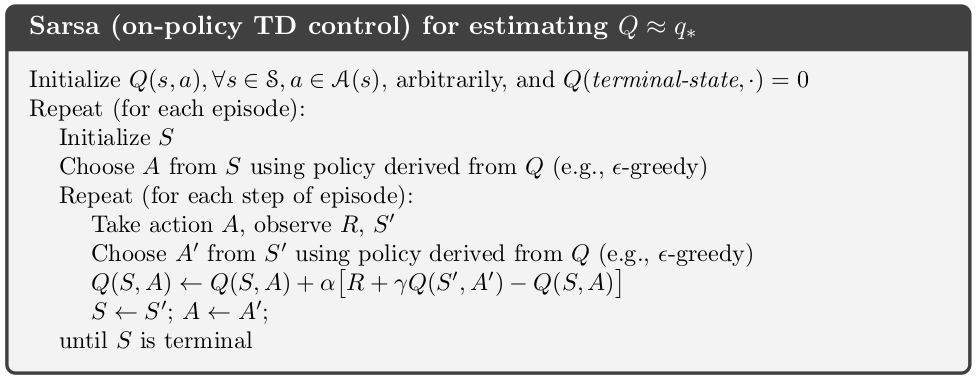

### 15. What code is yours and what have you adapted? (5 Points)

1. I modified the code so that eplison can be lowered as the learning progresses.
2. Added code so that the results of each round can be stored and easily plotted in a table.
3. Modified the code to use random policy for training.

### Reference:
1. Tutorial: An Introduction to Reinforcement Learning Using OpenAI Gym  
https://www.gocoder.one/blog/rl-tutorial-with-openai-gym
2. OpenAI Taxi-v2 game using Q learning  
https://github.com/Elmar999/Q-learning-OpenAI-Taxi-V2
3. What are the different states in Open AI Taxi Environment?  
https://stats.stackexchange.com/questions/359638/what-are-the-different-states-in-open-ai-taxi-environment
4. When to choose SARSA vs. Q Learning  
https://stats.stackexchange.com/questions/326788/when-to-choose-sarsa-vs-q-learning
5. What is the difference between Q-learning and SARSA?  
https://stackoverflow.com/questions/6848828/what-is-the-difference-between-q-learning-and-sarsa

### Below is the code:

In [1]:
#pip install gym[atari,accept-rom-license]==0.21.0

In [4]:
import gym
import numpy as np
import random
import math
import pandas as pd

In [5]:
env = gym.make("Taxi-v3")
env.observation_space.n
print(env.observation_space.n)

500


In [6]:
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
#Sample actions for exploration:
env.action_space.n, env.observation_space.n
# print(env.step(1))
# env.render()

(6, 500)

In [8]:
state = env.encode(4, 2, 3, 2) 
print("State:", state)
env.s = state
env.render()

State: 454
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [9]:
num_episodes = 2000
gamma = 0.9 #0.99
alpha = 0.8 #0.01
max_steps = 99                # Max steps per episode

epsilon = 1
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005             # Exponential decay rate for exploration prob


# initialize the Q table
Q = np.zeros([env.observation_space.n, env.action_space.n])
Q

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [10]:
episodes = []
points = []
steps = []

total_reward = 0
def train_Qtable(Q, env, num_episodes, epsilon, gamma, alpha):
    '''
    function trains Q table with given parameters
    Args:
        Q (numpy array): Q table which will be updated
        env (gym environment)
        num_episodes (int): number of games that will be played during training
        epsilon (int): probability threshold
        gamma (int): discount rate
        lr_rate (int): learning rate
    Returns:
        Q_optimal (numpy array): updated Q table which is converged to optimal
    '''

    Q_old = Q.copy()
    for i in range(num_episodes):
        # define initial state
        total_reward = 0
        state = env.reset()
        done = False
        for step in range(max_steps):
            # First we select an action:
            if random.uniform(0, 1) < epsilon: # take a random number
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(Q[state,:]) # Exploit learned values
            # Then we perform the action and receive the feedback from the environment
            new_state, reward, done, info = env.step(action)
            # Finally we learn from the experience by updating the Q-value of the selected action
            update = reward + (gammab * np.max(Q[new_state,:])) - Q[state, action]
            Q[state,action] += alpha*update 
            total_reward += reward
            
            ##if (Q_old == Q).all():
            ##    print("Q table has been converged to optimal in {}th iteration ".format(i))
            ##    return Q
            Q_old = Q.copy()
            state = new_state
            
            if done == True: 
                break
            
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i) 
        
        steps.append(step)
        episodes.append(i)
        points.append(total_reward)
        
    # even if Q table will not converge to optimal return latest updated Q table
    dataframe = pd.DataFrame({'Episode':episodes,'Point':points})
    dataframe.to_csv("Taxi_test.csv",index=False,sep=',')
    
    dataframe = pd.DataFrame({'Episode':episodes,'Steps':steps})
    dataframe.to_csv("Taxi_step.csv",index=False,sep=',')
    
    return Q

In [70]:
# train Q table
Q_optimal = train_Qtable(Q, env, num_episodes, epsilon, gamma, alpha)

In [55]:
print("Q table with optimal values:\n", Q_optimal )

Q table with optimal values:
 [[  0.           0.           0.           0.           0.
    0.        ]
 [ -5.86454856  -5.39477541  -1.13178687  -5.4575189    1.62261467
  -10.86785115]
 [  1.70813116   4.54003844   2.25738779   3.70001415   7.7147
   -4.83624826]
 ...
 [ -3.54798895  -3.24872561  -3.59974261  -3.53483694  -8.
  -11.53892106]
 [ -4.04190303   2.90900145  -2.09562863  -3.90544689 -11.247104
  -13.07234102]
 [ -0.992        8.73797769   9.96096     16.99999906   2.62944449
    2.26722778]]


##### Random policy

In [11]:
episodes = []
points = []
total_reward = 0
def train_Qtable_Random_Sampling(Q, env, num_episodes, epsilon, gamma, alpha):
    '''
    function trains Q table with given parameters
    Args:
        Q (numpy array): Q table which will be updated
        env (gym environment)
        num_episodes (int): number of games that will be played during training
        epsilon (int): probability threshold
        gamma (int): discount rate
        lr_rate (int): learning rate
    Returns:
        Q_optimal (numpy array): updated Q table which is converged to optimal
    '''

    Q_old = Q.copy()
    for i in range(num_episodes):
        # define initial state
        total_reward = 0
        state = env.reset()
        done = False
        for step in range(max_steps):
            # First we select an action:
            action = env.action_space.sample() # Explore action space
            # Then we perform the action and receive the feedback from the environment
            new_state, reward, done, info = env.step(action)
            # Finally we learn from the experience by updating the Q-value of the selected action
            update = reward + (gamma*np.max(Q[new_state,:])) - Q[state, action]
            Q[state,action] += alpha*update 
            total_reward += reward
            
            ##if (Q_old == Q).all():
            ##    print("Q table has been converged to optimal in {}th iteration ".format(i))
            ##    return Q
            Q_old = Q.copy()
            state = new_state
            
            if done == True: 
                break
            
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i) 
        episodes.append(i)
        points.append(total_reward)
        
    # even if Q table will not converge to optimal return latest updated Q table
    dataframe = pd.DataFrame({'Episode':episodes,'Point':points})
    dataframe.to_csv("Taxi_test_random_sampling.csv",index=False,sep=',')
    return Q

In [66]:
# train Q table
Q_optimal = train_Qtable_Random_Sampling(Q, env, num_episodes, epsilon, gamma, alpha)

##### Different eplison and decay rate

In [12]:
num_episodes = 2000
gamma = 0.9 #0.99
alpha = 0.8 
max_steps = 99               

epsilon = 0.7
max_epsilon = 1.0             
min_epsilon = 0.1        
decay_rate = 0.0001       

# initialize the Q table
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [40]:
episodes = []
points = []
total_reward = 0
def train_Qtable_Diff_eplison_decay(Q, env, num_episodes, epsilon, gamma, alpha):
    '''
    function trains Q table with given parameters
    Args:
        Q (numpy array): Q table which will be updated
        env (gym environment)
        num_episodes (int): number of games that will be played during training
        epsilon (int): probability threshold
        gamma (int): discount rate
        lr_rate (int): learning rate
    Returns:
        Q_optimal (numpy array): updated Q table which is converged to optimal
    '''

    Q_old = Q.copy()
    for i in range(num_episodes):
        # define initial state
        total_reward = 0
        state = env.reset()
        done = False
        for step in range(max_steps):
            if random.uniform(0, 1) < epsilon: # take a random number
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(Q[state,:]) # Exploit learned values
            # Then we perform the action and receive the feedback from the environment
            new_state, reward, done, info = env.step(action)
            # Finally we learn from the experience by updating the Q-value of the selected action
            update = reward + (gamma*np.max(Q[new_state,:])) - Q[state, action]
            Q[state,action] += alpha*update 
            total_reward += reward
            
            ##if (Q_old == Q).all():
            ##    print("Q table has been converged to optimal in {}th iteration ".format(i))
            ##    return Q
            Q_old = Q.copy()
            state = new_state
            
            if done == True: 
            break
            
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*i) 
        episodes.append(i)
        points.append(total_reward)
        
    # even if Q table will not converge to optimal return latest updated Q table
    dataframe = pd.DataFrame({'Episode':episodes,'Point':points})
    dataframe.to_csv("Taxi_test_different_decay_eplison.csv",index=False,sep=',')
    return Q

In [41]:
# train Q table
Q_optimal = train_Qtable_Diff_eplison_decay(Q, env, num_episodes, epsilon, gamma, alpha)

### License
MIT License

Copyright (c) 2022 Jiachi Sun

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.